<a href="https://colab.research.google.com/github/sgr1118/Movie-Inside/blob/main/DataThon(220728).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Inside EDA

## 목적 : 영화관 입장권 전산망 데이터 분석을 통하여 배급사에게 유의미한 분석 결과를 제공하기 위함

# 데이터 기본 전처리 과정

In [ ]:
#  구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 모듈 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_rows',100)
pd.set_option('max_columns',30)

In [ ]:
# 원본 데이터 불러오기 및 복사
original = pd.read_csv('/content/drive/MyDrive/데이터톤/Data/movie data.csv')
data = original.copy()
data.head()

,id,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
2,3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",NaN,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,개봉영화,장편,한국,"1,912","115,698,654,137","14,410,754","27,530,825,087","3,346,172",판타지,12세이상관람가,일반영화
3,4,국제시장,윤제균,"(주)제이케이필름,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2014-12-17,개봉영화,장편,한국,966,"110,828,014,630","14,245,998","25,842,519,330","3,233,946",드라마,12세이상관람가,일반영화
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화


In [ ]:
data.info()
# int형이라고 생각한 column이 object로 확인되 type 변환을 하기로 결정하였다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15352 entries, 0 to 15351
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       15352 non-null  int64 
 1   영화명      15352 non-null  object
 2   감독       14201 non-null  object
 3   제작사      4938 non-null   object
 4   수입사      9208 non-null   object
 5   배급사      15336 non-null  object
 6   개봉일      15352 non-null  object
 7   영화유형     15352 non-null  object
 8   영화형태     15352 non-null  object
 9   국적       15352 non-null  object
 10  전국 스크린수  15352 non-null  object
 11  전국 매출액   15352 non-null  object
 12  전국 관객수   15352 non-null  object
 13  서울 매출액   15352 non-null  object
 14  서울 관객수   15352 non-null  object
 15  장르       15281 non-null  object
 16  등급       15352 non-null  object
 17  영화구분     15352 non-null  object
dtypes: int64(1), object(17)
memory usage: 2.1+ MB


In [ ]:
# 데이터 타입 변환
col = ['전국 스크린수', '전국 매출액', '전국 관객수', '서울 매출액', '서울 관객수']

for i in col:
  data[i] = data[i].apply(lambda x: x.replace(',', ''))
  data[i] = pd.to_numeric(data[i])

In [ ]:
data.info()
# 인트형으로 변화한 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15352 entries, 0 to 15351
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       15352 non-null  int64 
 1   영화명      15352 non-null  object
 2   감독       14201 non-null  object
 3   제작사      4938 non-null   object
 4   수입사      9208 non-null   object
 5   배급사      15336 non-null  object
 6   개봉일      15352 non-null  object
 7   영화유형     15352 non-null  object
 8   영화형태     15352 non-null  object
 9   국적       15352 non-null  object
 10  전국 스크린수  15352 non-null  int64 
 11  전국 매출액   15352 non-null  int64 
 12  전국 관객수   15352 non-null  int64 
 13  서울 매출액   15352 non-null  int64 
 14  서울 관객수   15352 non-null  int64 
 15  장르       15281 non-null  object
 16  등급       15352 non-null  object
 17  영화구분     15352 non-null  object
dtypes: int64(6), object(12)
memory usage: 2.1+ MB


In [ ]:
# 분석에 사용하지 않을 컬럼 삭제
data.drop(columns = ['id', '제작사', '수입사', '영화유형', '영화형태'], axis = 1, inplace = True)
data.columns

Index(['영화명', '감독', '배급사', '개봉일', '국적', '전국 스크린수', '전국 매출액', '전국 관객수',
       '서울 매출액', '서울 관객수', '장르', '등급', '영화구분'],
      dtype='object')

In [ ]:
# 분석에 주로 사용할 '장르'컬럼을 확인하였다.
# '성인물(에로)'과 결측값은 제거 대상으로 결정하였다.
data['장르'].unique()

array(['사극', '코미디', '판타지', '드라마', '액션', '애니메이션', '어드벤처', '범죄', 'SF', '전쟁',
       '미스터리', '멜로/로맨스', '스릴러', '다큐멘터리', '공포(호러)', '뮤지컬', '가족', '공연',
       '기타', '서부극(웨스턴)', '성인물(에로)', nan], dtype=object)

In [ ]:
# 데이터 결측치 확인
data.isnull().sum()
# 감독 1151개, 배급사 16개, 장르 71개

영화명           0
감독         1151
배급사          16
개봉일           0
국적            0
전국 스크린수       0
전국 매출액        0
전국 관객수        0
서울 매출액        0
서울 관객수        0
장르           71
등급            0
영화구분          0
dtype: int64

In [ ]:
# 성인물 컬럼 삭제
delete = data[data['장르']=='성인물(에로)'].index
data.drop(index = delete, inplace=True)

In [ ]:
data['장르'].unique()

array(['사극', '코미디', '판타지', '드라마', '액션', '애니메이션', '어드벤처', '범죄', 'SF', '전쟁',
       '미스터리', '멜로/로맨스', '스릴러', '다큐멘터리', '공포(호러)', '뮤지컬', '가족', '공연',
       '기타', '서부극(웨스턴)', nan], dtype=object)

In [ ]:
delete2 = data[data['장르'].isna()].index
data.drop(index = delete2, inplace=True)

In [ ]:
delete3 = data[data['전국 관객수'] <= 400].index
data.drop(index = delete3, inplace=True)

In [ ]:
data.shape

(5507, 13)

In [ ]:
# 전처리 데이터 복사
data_clear = data.copy()
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5507 entries, 0 to 5508
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      5507 non-null   object
 1   감독       5257 non-null   object
 2   배급사      5506 non-null   object
 3   개봉일      5507 non-null   object
 4   국적       5507 non-null   object
 5   전국 스크린수  5507 non-null   int64 
 6   전국 매출액   5507 non-null   int64 
 7   전국 관객수   5507 non-null   int64 
 8   서울 매출액   5507 non-null   int64 
 9   서울 관객수   5507 non-null   int64 
 10  장르       5507 non-null   object
 11  등급       5507 non-null   object
 12  영화구분     5507 non-null   object
dtypes: int64(5), object(8)
memory usage: 602.3+ KB


In [ ]:
# 전처리 데이터 csv 저장
data_clear.to_csv('data.csv', index=False)

# 주목이 필요한 데이터 전국 관객수, 개봉영화수

- 연간 월 단위로 전국 관객수 집계하여 라인 그래프로 시각화

Text(0.5, 1.0, '전국 상영 영화수')

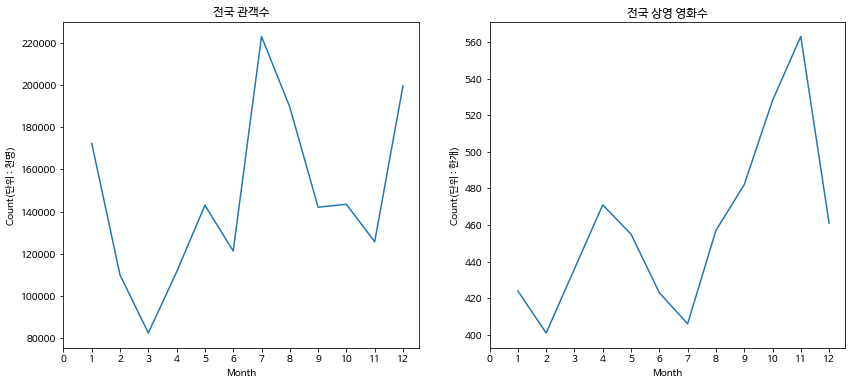

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import warnings
warnings.filterwarnings('ignore')
y=data2.groupby('mon').count()['month']
xticks = [ i for i in range(13)]
data_clear = pd.read_csv('/content/drive/MyDrive/데이터톤/data.csv')
data_clear

fig, axes= plt.subplots(1,2, figsize=(14,6))   # axes는 Axes객체의 2x2의 배열
axes[0].plot(data2.groupby('mon')['전국 관객수'].sum()/1000, color='#e35f62')
axes[1].plot(y)
axes[0].set_ylabel('Count(단위 : 천명)')
axes[0].set_xlabel('Month')
axes[0].set_xticks(xticks)
axes[0].set_title('전국 관객수')
axes[1].set_ylabel('Count(단위 : 한개)')
axes[1].set_xlabel('Month')
axes[1].set_xticks(xticks)
axes[1].set_title('전국 상영 영화수')

# 개봉되는 영화는 적지만, 관객수는 7월에 가장 많다. 
# 그 의미는 즉, 대흥행 블록버스터급 영화들이 7월에 집중되어 있으므로 되도록이면 큰 투자비용으로 막대한 수익을 노리는 영화가 아닌 이상 7월에 영화를 개봉하는 것은 추천되지 않는다.

In [ ]:
# 장르별 DataFrame 추출
horror = data_clear[data_clear['장르']=="공포(호러)"]
history = data_clear[data_clear['장르']=="사극"]
comedy = data_clear[data_clear['장르']=="코미디"]
fantasy = data_clear[data_clear['장르']=="판타지"]
drama = data_clear[data_clear['장르']=="드라마"]
action = data_clear[data_clear['장르']=="액션"]
animation = data_clear[data_clear['장르']=="애니메이션"]
adventure = data_clear[data_clear['장르']=="어드벤처"]
SF = data_clear[data_clear['장르']=="SF"]
war = data_clear[data_clear['장르']=="전쟁"]
mistery = data_clear[data_clear['장르']=="미스터리"]
melo = data_clear[data_clear['장르']=="멜로/로맨스"]
thriler = data_clear[data_clear['장르']=="스릴러"]
documantary = data_clear[data_clear['장르']=="다큐멘터리"]
musical = data_clear[data_clear['장르']=="뮤지컬"]
family = data_clear[data_clear['장르']=="가족"]
performance = data_clear[data_clear['장르']=="공연"]
etc = data_clear[data_clear['장르']=="기타"]
westen = data_clear[data_clear['장르']=="서부극(웨스턴)"]

Text(0.5, 1.0, '공포(호러) 상영 영화수')

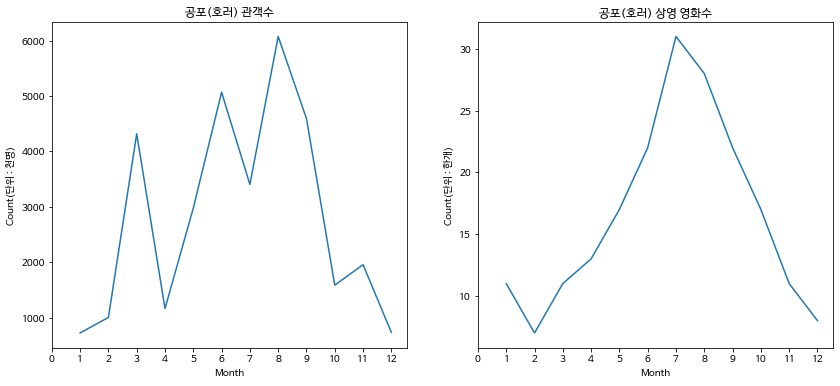

In [ ]:
# 호러 영화 관측치
yhorror=horror.groupby('mon').count()['month']
yhistory=history.groupby('mon').count()['month']
ycomedy=comedy.groupby('mon').count()['month']
yaction=action.groupby('mon').count()['month']
yfamily=family.groupby('mon').count()['month']
ydrama=drama.groupby('mon').count()['month']
yanimation=animation.groupby('mon').count()['month']
ydocumantary=documantary.groupby('mon').count()['month']

xticks = [ i for i in range(13)]

fig, axes= plt.subplots(1,2, figsize=(14,6))   # axes는 Axes객체의 2x2의 배열
axes[0].plot(horror.groupby('mon')['전국 관객수'].sum()/1000)
axes[1].plot(yhorror)
axes[0].set_ylabel('Count(단위 : 천명)')
axes[0].set_xlabel('Month')
axes[0].set_xticks(xticks)
axes[0].set_title('공포(호러) 관객수')
axes[1].set_ylabel('Count(단위 : 한개)')
axes[1].set_xlabel('Month')
axes[1].set_xticks(xticks)
axes[1].set_title('공포(호러) 상영 영화수')


plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(horror.groupby('mon')['전국 관객수'].sum())
plt.subplot(1, 2, 2)
plt.plot(yhorror)
plt.show
# 예상했던 것과 별개로 7월에 공포영화를 보지 않는다. 공포영화는 많이 개봉이 되어도 관객수는 대비로 적다. 차라리 8월에 영화를 내서 트렌드에 편승하는 게 나을 거 같다. 
# 과도한 공포영화의 공급으로 7월에는 공포영화에 질림 효과가 난 게 아닌가 한다.

# 드라마 관측치

Text(0.5, 1.0, '드라마 상영 영화수')

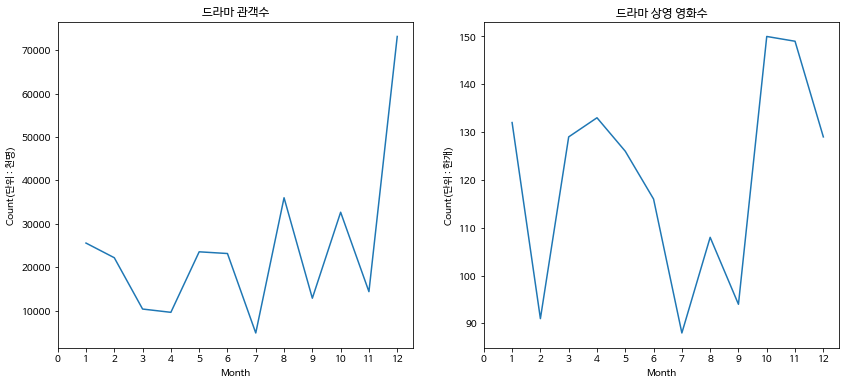

In [ ]:
# 드라마
fig, axes= plt.subplots(1,2, figsize=(14,6))   # axes는 Axes객체의 2x2의 배열
axes[0].plot(drama.groupby('mon')['전국 관객수'].sum()/1000)
axes[1].plot(ydrama)
axes[0].set_ylabel('Count(단위 : 천명)')
axes[0].set_xlabel('Month')
axes[0].set_xticks(xticks)
axes[0].set_title('드라마 관객수')
axes[1].set_ylabel('Count(단위 : 한개)')
axes[1].set_xlabel('Month')
axes[1].set_xticks(xticks)
axes[1].set_title('드라마 상영 영화수')

# 1월달에 관객들이 주로 집중되어 있다. 새해에 가족끼리 코미디 영화를 보러가는 것으로 추측된다.

# 코미디 관측치

Text(0.5, 1.0, '코미디 상영 영화수')

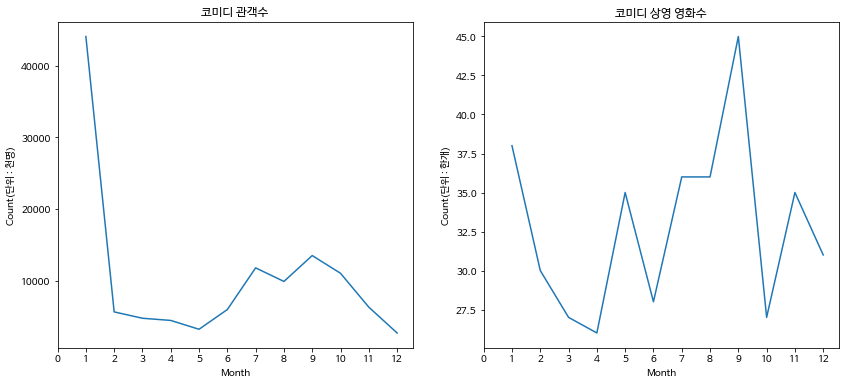

In [ ]:
# 코미디
fig, axes= plt.subplots(1,2, figsize=(14,6))   # axes는 Axes객체의 2x2의 배열
axes[0].plot(comedy.groupby('mon')['전국 관객수'].sum()/1000)
axes[1].plot(ycomedy)
axes[0].set_ylabel('Count(단위 : 천명)')
axes[0].set_xlabel('Month')
axes[0].set_xticks(xticks)
axes[0].set_title('코미디 관객수')
axes[1].set_ylabel('Count(단위 : 한개)')
axes[1].set_xlabel('Month')
axes[1].set_xticks(xticks)
axes[1].set_title('코미디 상영 영화수')


# 1월달에 관객들이 주로 집중되어 있다. 새해에 가족끼리 코미디 영화를 보러가는 것으로 추측된다.

# 액션 관측치

Text(0.5, 1.0, '액션 상영 영화수')

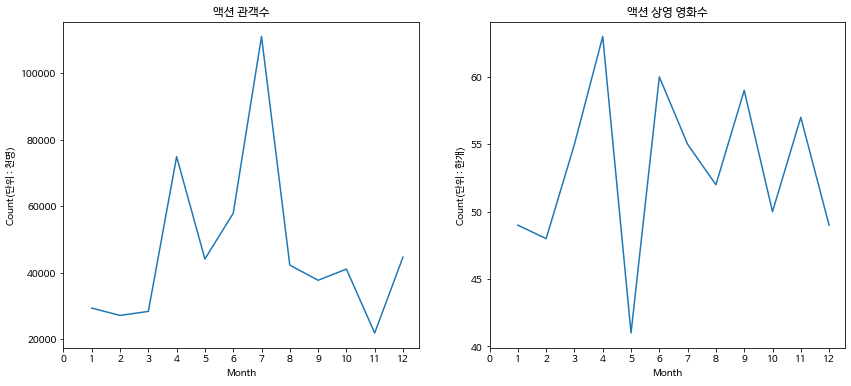

In [ ]:
# action
fig, axes= plt.subplots(1,2, figsize=(14,6))   # axes는 Axes객체의 2x2의 배열
axes[0].plot(action.groupby('mon')['전국 관객수'].sum()/1000)
axes[1].plot(yaction)
axes[0].set_ylabel('Count(단위 : 천명)')
axes[0].set_xlabel('Month')
axes[0].set_xticks(xticks)
axes[0].set_title('액션 관객수')
axes[1].set_ylabel('Count(단위 : 한개)')
axes[1].set_xlabel('Month')
axes[1].set_xticks(xticks)
axes[1].set_title('액션 상영 영화수')
 

# 애니메이션 관측치

Text(0.5, 1.0, '애니메이션 상영 영화수')

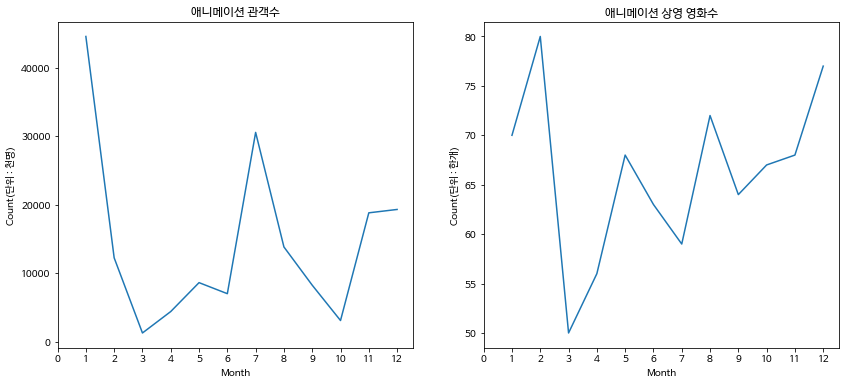

In [ ]:
# 애니메이션
fig, axes= plt.subplots(1,2, figsize=(14,6))   # axes는 Axes객체의 2x2의 배열
axes[0].plot(animation.groupby('mon')['전국 관객수'].sum()/1000)
axes[1].plot(yanimation)
axes[0].set_ylabel('Count(단위 : 천명)')
axes[0].set_xlabel('Month')
axes[0].set_xticks(xticks)
axes[0].set_title('애니메이션 관객수')
axes[1].set_ylabel('Count(단위 : 한개)')
axes[1].set_xlabel('Month')
axes[1].set_xticks(xticks)
axes[1].set_title('애니메이션 상영 영화수')


# 다큐멘터리 관측치

Text(0.5, 1.0, '다큐멘터리 상영 영화수')

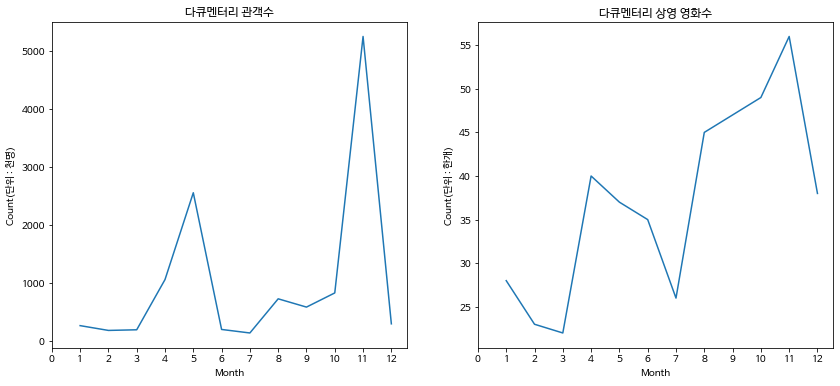

In [ ]:
#다큐멘터리
fig, axes= plt.subplots(1,2, figsize=(14,6))   # axes는 Axes객체의 2x2의 배열
axes[0].plot(documantary.groupby('mon')['전국 관객수'].sum()/1000)
axes[1].plot(ydocumantary)
axes[0].set_ylabel('Count(단위 : 천명)')
axes[0].set_xlabel('Month')
axes[0].set_xticks(xticks)
axes[0].set_title('다큐멘터리 관객수')
axes[1].set_ylabel('Count(단위 : 한개)')
axes[1].set_xlabel('Month')
axes[1].set_xticks(xticks)
axes[1].set_title('다큐멘터리 상영 영화수')

# 워드클라우드 그리기

# 연 단위 장르 키워드를 추출하여 워드클라우드 작성

- 전처리된 csv파일에서 개봉일 컬럼을 연 단위로 분리

- 연간 장르 키워드를 추출하고 워드클라우드 함수 구현

In [ ]:
# 한글 깨짐 방지를 위한 폰트 설치
# 설치후 런타임 초기화 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 워드 클라우드 그리기
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.font_manager as fm
font_path = '/content/drive/MyDrive/데이터톤/H2GTRE.TTF'
fontprop = fm.FontProperties(fname=font_path, size=18)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 전처리된 데이터 불러오기
data_clear = pd.read_csv('/content/drive/MyDrive/데이터톤/data.csv')
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5507 entries, 0 to 5506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      5507 non-null   object
 1   감독       5257 non-null   object
 2   배급사      5506 non-null   object
 3   개봉일      5507 non-null   object
 4   국적       5507 non-null   object
 5   전국 스크린수  5507 non-null   int64 
 6   전국 매출액   5507 non-null   int64 
 7   전국 관객수   5507 non-null   int64 
 8   서울 매출액   5507 non-null   int64 
 9   서울 관객수   5507 non-null   int64 
 10  장르       5507 non-null   object
 11  등급       5507 non-null   object
 12  영화구분     5507 non-null   object
dtypes: int64(5), object(8)
memory usage: 559.4+ KB


In [ ]:
# 개봉일 컬럼 datetime을 사용하여 날짜 데이터 분리 가능하게 변환
data_clear['개봉일'] = pd.to_datetime(data_clear['개봉일'])
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5507 entries, 0 to 5506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   영화명      5507 non-null   object        
 1   감독       5257 non-null   object        
 2   배급사      5506 non-null   object        
 3   개봉일      5507 non-null   datetime64[ns]
 4   국적       5507 non-null   object        
 5   전국 스크린수  5507 non-null   int64         
 6   전국 매출액   5507 non-null   int64         
 7   전국 관객수   5507 non-null   int64         
 8   서울 매출액   5507 non-null   int64         
 9   서울 관객수   5507 non-null   int64         
 10  장르       5507 non-null   object        
 11  등급       5507 non-null   object        
 12  영화구분     5507 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 559.4+ KB


In [ ]:
# 개봉일 연간으로 추출
data_clear['y'] = data_clear['개봉일'].dt.year
# data_clear 컬럼 위치 비교
data_clear = data_clear[['영화명', '감독', '배급사','y', '개봉일', '국적', '전국 스크린수', '전국 매출액', '전국 관객수',
       '서울 매출액', '서울 관객수', '장르', '등급', '영화구분']]
#data_clear.info()

In [ ]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5507 entries, 0 to 5506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   영화명      5507 non-null   object        
 1   감독       5257 non-null   object        
 2   배급사      5506 non-null   object        
 3   y        5507 non-null   int64         
 4   개봉일      5507 non-null   datetime64[ns]
 5   국적       5507 non-null   object        
 6   전국 스크린수  5507 non-null   int64         
 7   전국 매출액   5507 non-null   int64         
 8   전국 관객수   5507 non-null   int64         
 9   서울 매출액   5507 non-null   int64         
 10  서울 관객수   5507 non-null   int64         
 11  장르       5507 non-null   object        
 12  등급       5507 non-null   object        
 13  영화구분     5507 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(7)
memory usage: 602.5+ KB


In [ ]:
# 워드 클라우드 함수 구현
def wordcloud(x):
  data_year = data_clear[data_clear['y'] == x] # 연도별 데이터를 DataFrame형태로 저장

  fr = data_year['장르'].value_counts()
  df_fr = pd.DataFrame(data = fr)
  df_fr.columns = ['빈도']
  
  word_freq = df_fr['빈도'].to_dict()
  wordcloud = WordCloud(font_path = font_path,
                      background_color = 'white',
                      colormap='autumn',
                      max_words = 20,
                      relative_scaling=0.5,
                      width = 800,
                      height = 400).generate_from_frequencies(word_freq)

  plt.figure(figsize=(12,10))
  plt.imshow(wordcloud)
  plt.title("Word Frequency", size = 13)
  plt.axis('off')
  plt.show()

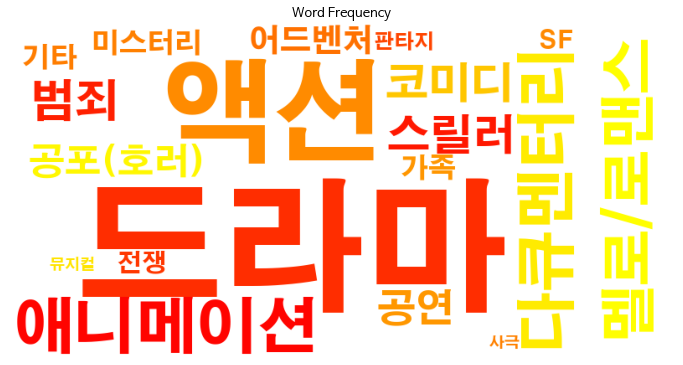

In [ ]:
# 함수 출력
wordcloud(2022)

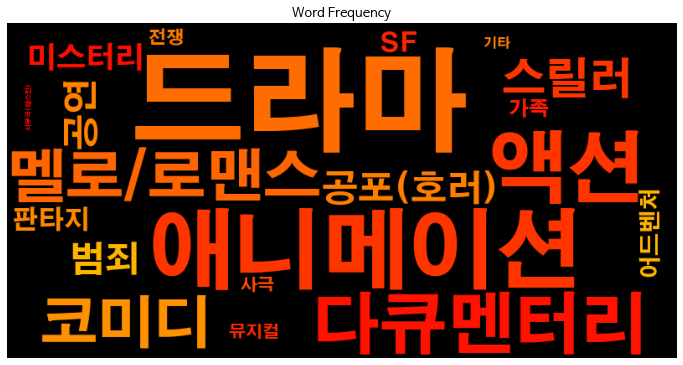

In [ ]:
# 2012~2022 장르빈도 워드클라우드
count = data_clear['장르'].value_counts()
df = pd.DataFrame(data = count)
df.columns = ['빈도']

word_freq = df['빈도'].to_dict()
wordcloud = WordCloud(font_path = font_path,
                      background_color = 'black',
                      colormap='autumn',
                      max_words = 20,
                      relative_scaling=0.5,
                      width = 800,
                      height = 400).generate_from_frequencies(word_freq)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.title("Word Frequency", size = 13)
plt.axis('off')
plt.show()

# 배급사별 개봉 영화 현황 파악

In [ ]:
#data_clear['배급사'].value_counts().head(10)

(주)씨제이이엔엠              187
유니버설픽쳐스인터내셔널 코리아(유)    171
(주)팝엔터테인먼트             171
(주)넥스트엔터테인먼트월드(NEW)    131
(주)영화사 진진              131
롯데쇼핑㈜롯데엔터테인먼트          128
와이드 릴리즈(주)             121
(주)박수엔터테인먼트            121
(주)소나무픽쳐스              104
워너브러더스 코리아(주)          103
Name: 배급사, dtype: int64

In [ ]:
index = ['(주)씨제이이엔엠', '유니버설픽쳐스인터내셔널 코리아(유)', '(주)팝엔터테인먼트', '(주)넥스트엔터테인먼트월드(NEW)', '(주)영화사 진진',
        '롯데쇼핑㈜롯데엔터테인먼트', '와이드 릴리즈(주)', '(주)박수엔터테인먼트', '(주)소나무픽쳐스', '워너브러더스 코리아(주)']

suplier_list = []
for i in index:
  suplier = data_clear[data_clear['배급사'] == i]
  suplier_list.append(suplier)
suplier_list

suplier_10 = pd.DataFrame()
for i in range(len(suplier_list)):
  suplier_10 = pd.concat([suplier_10 ,suplier_list[i]], axis = 0)
  
suplier_10

In [ ]:
suplier_10 = pd.DataFrame()
for i in range(len(suplier_list)):
  suplier_10 = pd.concat([suplier_10 ,suplier_list[i]], axis = 0)
  
suplier_10

# 국적 별 영화 개봉 현황

- 국적 별 개봉영화 수 및 관객수 수평 막대 시각화 : 가장 많은 국적과 관객수 분포 확인
- 개봉 영화수와 누적 관객수과 가장 많은 국가 2개를 추출하여 개봉 영화, 누적 관객수, 개봉 영화 대비 누적 관객수 비교

In [ ]:
# 전처리된 데이터 불러오기
data_clear = pd.read_csv('/content/drive/MyDrive/데이터톤/data.csv')
data_clear.head()

In [ ]:
# 국내 개봉 영화 top10 국적을 DataFrame 형태로 출력
top_10 = data_clear['국적'].value_counts().head(10)
top_10_df = pd.DataFrame(data = top_10, columns = ['국적'])
top_10_df.reset_index(drop=False, inplace = True)
top_10_df.columns = ['국적', '개봉영화']
top_10_df

,국적,개봉영화
0,한국,1653
1,미국,1551
2,일본,569
3,프랑스,348
4,영국,280
5,중국,173
6,독일,165
7,스페인,80
8,캐나다,79
9,이탈리아,62


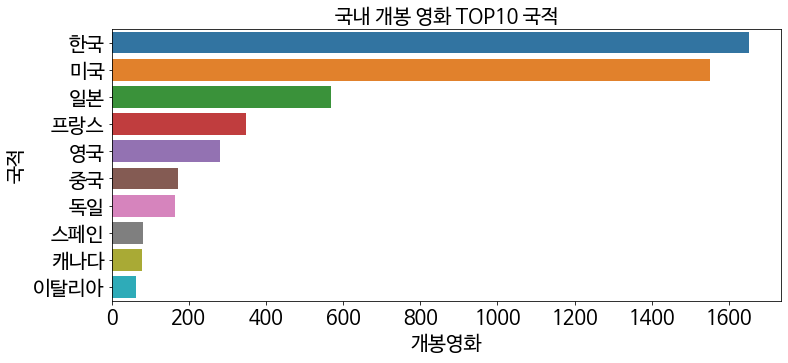

In [ ]:
# 국내 개봉 영화 top10 국적 수평 막대그래프
f, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x = '개봉영화', y = '국적', data = top_10_df, orient='h')
plt.xlabel('개봉영화', size = 20)
plt.ylabel('국적', size = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('국내 개봉 영화 TOP10 국적', size = 20)
plt.show()

In [ ]:
# 국내 개봉 영화 top10 국적별 누적 관객수(전국 관객수)
top_10_관객 = data_clear.groupby('국적').sum()
top_10_관객.sort_values(by='전국 관객수', ascending=False, inplace=True)
top_10_관객 = top_10_관객.head(10)
top_10_관객['누적 관객수'] = top_10_관객['전국 관객수'] / 1000
top_10_관객.reset_index(level=0,  inplace=True)
top_10_관객

,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,누적 관객수
0,한국,475668,7510022615740,945421863,1875348493977,228945370,945421.863
1,미국,509565,6096664312349,734713646,1865969158454,214507613,734713.646
2,일본,71033,248153705916,31676770,70691711902,8618370,31676.770
3,영국,33936,137083365709,17709429,52447297397,6533942,17709.429
4,프랑스,28990,73797035548,9622244,30505271860,3799562,9622.244
5,독일,10803,26636583031,3473609,8327364352,950551,3473.609
6,벨기에,2852,23916143830,3302052,5641428930,734878,3302.052
7,중국,19586,21868045320,3037429,5762524650,751399,3037.429
8,스페인,8121,17972021191,2482151,5339051442,707759,2482.151
9,러시아,8481,15890526196,2200349,3485542156,476682,2200.349


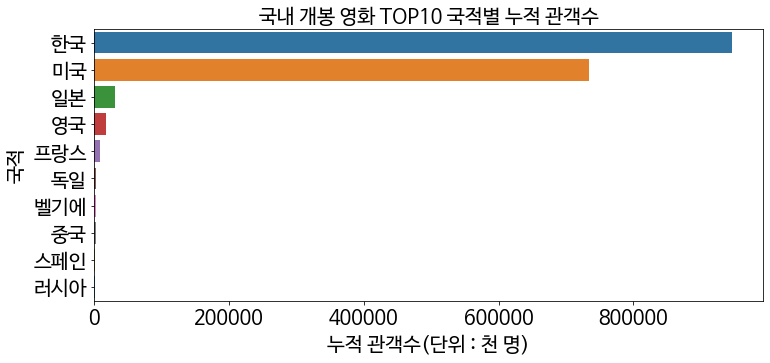

In [ ]:
# 국내 개봉 영화 top10 국적별 누적 관객수 수평 막대그래프
f, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x = '누적 관객수', y = '국적', data = top_10_관객, orient='h')
plt.xlabel('누적 관객수(단위 : 천 명)', size = 20)
plt.ylabel('국적', size = 20)
plt.title('국내 개봉 영화 TOP10 국적별 누적 관객수', size = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
# 국내영화 vs 외국영화 관객수 비교하여 어떤 영화 위주로 배급하는 것이 유리할지 확인
# 한국영화와 미국영화의 관객수 차이를 비교
import seaborn as sns
data_clear['국적'].value_counts()
korea = data_clear[data_clear['국적'] == '한국']
usa = data_clear[data_clear['국적'] == '미국']

# 개봉 영화 수
kor_movie = len(korea) # 1653
usa_movie = len(usa) # 1551

# 누적 관객수
kor_pop = korea['전국 관객수'].sum() / 1000 # 945421863
usa_pop = usa['전국 관객수'].sum() / 1000 # 734713646

# 누적 관객수 / 개봉 영화 수
K = kor_pop / kor_movie # 571943.050816697 
U = usa_pop / usa_movie # 473703.1889103804



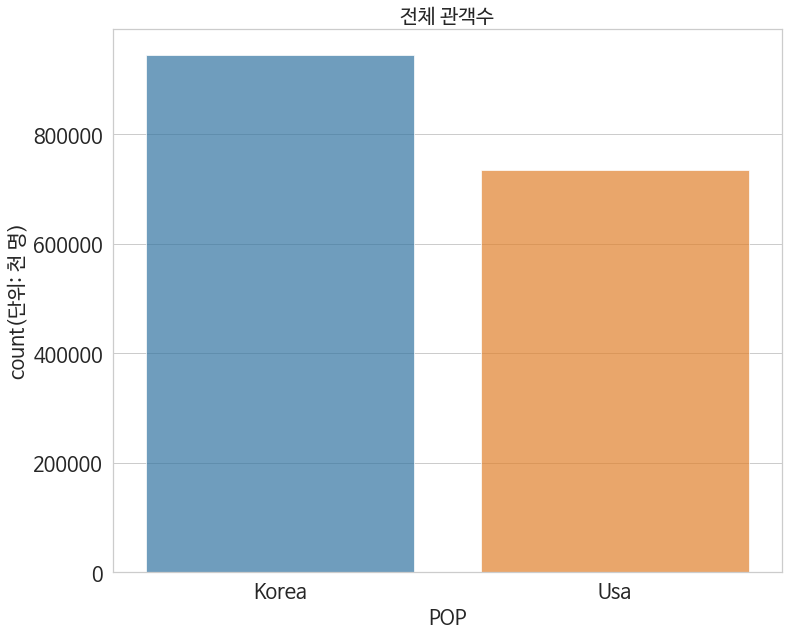

In [ ]:
# 누적 관객수 비교
nation = ['Korea', 'Usa']
values = [kor_pop, usa_pop]

plt.figure(figsize = (12,10))

sns.barplot(x = nation, y = values, alpha=0.7, palette = 'tab10')
plt.xlabel('POP', size = 20)
plt.ylabel('count(단위: 천 명)', size = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('전체 관객수', size = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


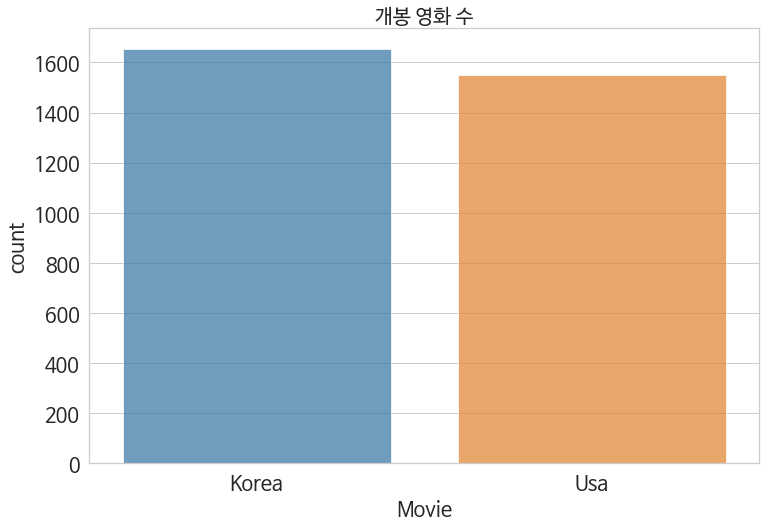

In [ ]:
# 개봉영화 수 비교
nation = ['Korea', 'Usa']
values = [kor_movie, usa_movie]

plt.figure(figsize = (12,8))

sns.barplot(nation, values, alpha=0.7, palette = 'tab10')
plt.xlabel('Movie', size = 20)
plt.ylabel('count', size = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('개봉 영화 수', size = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


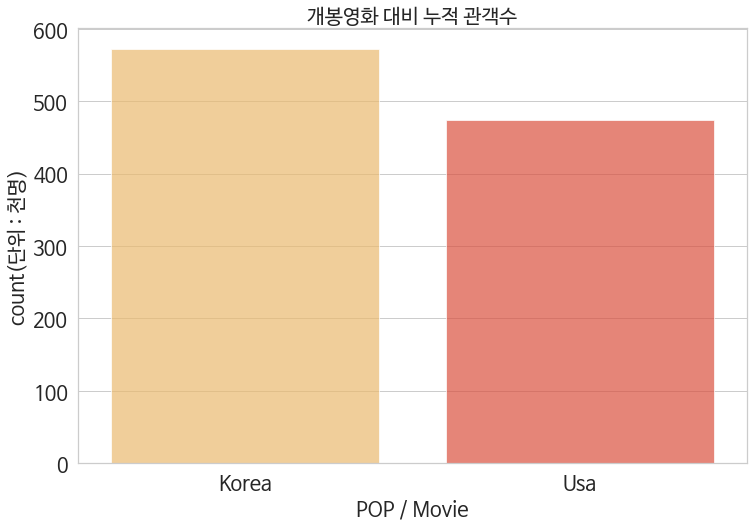

In [ ]:
# 누적 관객수 / 개봉영화 
nation = ['Korea', 'Usa']
values = [K, U]

plt.figure(figsize = (12,8))

sns.barplot(nation, values, alpha=0.7, palette = 'YlOrRd')
plt.xlabel('POP / Movie', size = 20)
plt.ylabel('count(단위 : 천명)', size = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('개봉영화 대비 누적 관객수', size = 20)

plt.show()

# 코사인 유사도를 활용한 년간 장르의 유사성 파악

- 개봉일 컬럼에서 년, 월 단위로 나눠서 컬럼을 생성
- 분기별 데이터 분리 후 장르 키워드를 리스트
- 리스트 > 문장화 작업 시행
- 문장화된 데이터는 TF-IDF 벡터화를 진행
- 각 년도 분기에 대하여 코사인 유사도를 시행
- 결과 시각화

In [ ]:
# 데이터 불러오기
data_clear = pd.read_csv('/content/drive/MyDrive/데이터톤/data.csv')

In [ ]:
# 'm' 컬럼 추가
data_clear['개봉일'] =  pd.to_datetime(data_clear['개봉일'])
data_clear['y'] = data_clear['개봉일'].dt.year
data_clear['m'] = data_clear['개봉일'].dt.month
data_clear.columns

Index(['영화명', '감독', '배급사', 'y', 'm', '개봉일', '국적', '전국 스크린수', '전국 매출액',
       '전국 관객수', '서울 매출액', '서울 관객수', '장르', '등급', '영화구분'],
      dtype='object')

In [ ]:
# 'm' 컬럼 위치 조정하기
data_clear = data_clear[['영화명', '감독', '배급사', 'y', 'm', '개봉일', '국적', '전국 스크린수', '전국 매출액', '전국 관객수',
       '서울 매출액', '서울 관객수', '장르', '등급', '영화구분']]

In [ ]:
# 리스트를 문자열로 변환
def listToString(str_list):
  result = ""
  for s in str_list:
      result += s + " "
  return result.strip()

In [ ]:
# 연도 분리후 분기 데이터 추출하는 함수 작성
def quarter(a, b, c):
  data_year = data_clear[data_clear['y'] == a]
  data_Q = data_year[(data_year['m'] >= b) & (data_year['m'] <= c)]
  data_Q_L = data_Q.loc[:, '장르'].to_list()
# 분기 데이터 리스트화 
  str_list = data_Q_L
  result_year_Q = listToString(str_list)
  return result_year_Q

In [ ]:
# 13~22년 1분기 장르 문장화
quarter(2013, 1, 3)
quarter(2014, 1, 3)
quarter(2015, 1, 3)
quarter(2016, 1, 3)
quarter(2017, 1, 3)
quarter(2018, 1, 3)
quarter(2019, 1, 3)
quarter(2020, 1, 3)
quarter(2021, 1, 3)
quarter(2022, 1, 3)

'어드벤처 액션 애니메이션 드라마 액션 범죄 애니메이션 드라마 액션 범죄 범죄 범죄 액션 범죄 드라마 애니메이션 미스터리 드라마 멜로/로맨스 액션 애니메이션 다큐멘터리 범죄 코미디 범죄 어드벤처 애니메이션 액션 멜로/로맨스 액션 멜로/로맨스 공연 멜로/로맨스 멜로/로맨스 사극 드라마 멜로/로맨스 드라마 드라마 애니메이션 애니메이션 애니메이션 공연 드라마 가족 다큐멘터리 드라마 드라마 멜로/로맨스 드라마 멜로/로맨스 드라마 다큐멘터리 미스터리 멜로/로맨스 드라마 다큐멘터리 액션 애니메이션 드라마 애니메이션 애니메이션 다큐멘터리 애니메이션 드라마 드라마 범죄 멜로/로맨스 드라마 드라마 멜로/로맨스 공포(호러) 드라마 액션 스릴러 드라마 드라마 드라마 다큐멘터리 다큐멘터리 드라마 코미디 액션 공연 드라마 공포(호러) 드라마 멜로/로맨스 코미디 드라마 다큐멘터리 가족 드라마 액션 다큐멘터리 스릴러 액션 기타 드라마 스릴러 멜로/로맨스 뮤지컬 드라마 액션 코미디 멜로/로맨스 액션 기타 스릴러 전쟁 액션 액션 어드벤처 어드벤처 다큐멘터리 다큐멘터리 액션'

In [ ]:
# 13~22년 2분기 장르 문장화
quarter(2013, 4, 6)
quarter(2014, 4, 6)
quarter(2015, 4, 6)
quarter(2016, 4, 6)
quarter(2017, 4, 6)
quarter(2018, 4, 6)
quarter(2019, 4, 6)
quarter(2020, 4, 6)
quarter(2021, 4, 6)
quarter(2022, 4, 6)

'범죄 액션 액션 액션 액션 드라마 어드벤처 애니메이션 드라마 애니메이션 다큐멘터리 애니메이션 애니메이션 미스터리 스릴러 드라마 애니메이션 액션 액션 공포(호러) 코미디 공연 드라마 드라마 드라마 드라마 다큐멘터리 드라마 드라마 가족 드라마 드라마 스릴러 애니메이션 판타지 애니메이션 액션 액션 드라마 드라마 드라마 애니메이션 애니메이션 액션 다큐멘터리 스릴러 드라마 드라마 코미디 드라마 드라마 공연 다큐멘터리 다큐멘터리 코미디 드라마 스릴러 드라마 멜로/로맨스 가족 드라마 드라마 미스터리 애니메이션 멜로/로맨스 드라마 다큐멘터리 판타지 멜로/로맨스 코미디 공포(호러) 드라마 드라마 드라마 범죄 범죄 액션 코미디 공연 기타 애니메이션 드라마 기타 액션 다큐멘터리 다큐멘터리 다큐멘터리 멜로/로맨스 액션 다큐멘터리 공연 액션 공포(호러) 드라마 드라마 멜로/로맨스 스릴러 드라마 액션 드라마 스릴러 액션 액션 다큐멘터리 다큐멘터리 드라마 드라마 드라마 SF 코미디 SF 전쟁 액션 SF 액션 공포(호러) 공포(호러) 전쟁 공연'

In [ ]:
# 12~21년 3분기 장르 문장화
quarter(2012, 7, 9)
quarter(2013, 7, 9)
quarter(2014, 7, 9)
quarter(2015, 7, 9)
quarter(2016, 7, 9)
quarter(2017, 7, 9)
quarter(2018, 7, 9)
quarter(2019, 7, 9)
quarter(2020, 7, 9)
quarter(2021, 7, 9)

'액션 액션 코미디 액션 액션 범죄 액션 애니메이션 공포(호러) 드라마 액션 액션 액션 액션 애니메이션 애니메이션 미스터리 공포(호러) 미스터리 공포(호러) 드라마 애니메이션 애니메이션 애니메이션 미스터리 스릴러 코미디 멜로/로맨스 SF 액션 애니메이션 어드벤처 스릴러 스릴러 애니메이션 공연 드라마 멜로/로맨스 애니메이션 공연 코미디 공포(호러) 드라마 미스터리 애니메이션 드라마 드라마 코미디 코미디 애니메이션 드라마 드라마 액션 드라마 애니메이션 드라마 애니메이션 드라마 드라마 코미디 드라마 애니메이션 애니메이션 스릴러 다큐멘터리 액션 드라마 드라마 드라마 액션 액션 액션 다큐멘터리 드라마 다큐멘터리 미스터리 공포(호러) 공포(호러) 드라마 드라마 범죄 멜로/로맨스 코미디 멜로/로맨스 공포(호러) 드라마 범죄 코미디 액션 코미디 드라마 다큐멘터리 드라마 드라마 범죄 드라마 다큐멘터리 애니메이션 드라마 공포(호러) 액션 공연 스릴러 멜로/로맨스 다큐멘터리 다큐멘터리 드라마 다큐멘터리 애니메이션 범죄 미스터리 멜로/로맨스 애니메이션 액션 다큐멘터리 다큐멘터리 애니메이션 공포(호러) 액션 판타지 드라마 코미디'

In [ ]:
# 12~21년 4분기 장르 문장화
quarter(2012, 10, 12)
quarter(2013, 10, 12)
quarter(2014, 10, 12)
quarter(2015, 10, 12)
quarter(2016, 10, 12)
quarter(2017, 10, 12)
quarter(2018, 10, 12)
quarter(2019, 10, 12)
quarter(2020, 10, 12)
quarter(2021, 10, 12)

'액션 액션 액션 SF 액션 판타지 애니메이션 멜로/로맨스 드라마 범죄 멜로/로맨스 액션 애니메이션 어드벤처 애니메이션 뮤지컬 코미디 드라마 코미디 애니메이션 액션 애니메이션 공포(호러) 애니메이션 드라마 애니메이션 애니메이션 애니메이션 다큐멘터리 다큐멘터리 애니메이션 애니메이션 스릴러 범죄 멜로/로맨스 다큐멘터리 드라마 드라마 공포(호러) 드라마 드라마 드라마 드라마 드라마 드라마 드라마 드라마 뮤지컬 다큐멘터리 공포(호러) 드라마 다큐멘터리 다큐멘터리 액션 다큐멘터리 애니메이션 멜로/로맨스 판타지 드라마 드라마 드라마 드라마 드라마 드라마 다큐멘터리 코미디 애니메이션 다큐멘터리 공포(호러) 드라마 애니메이션 뮤지컬 애니메이션 SF 애니메이션 범죄 액션 다큐멘터리 드라마 드라마 드라마 액션 공연 기타 드라마 다큐멘터리 애니메이션 스릴러 공포(호러) 드라마 드라마 드라마 다큐멘터리 드라마 범죄 드라마 애니메이션 애니메이션 멜로/로맨스 공포(호러) 드라마 드라마 스릴러 스릴러 멜로/로맨스 액션 다큐멘터리 멜로/로맨스 드라마 다큐멘터리 다큐멘터리 드라마 SF 드라마 코미디 드라마 다큐멘터리 코미디 멜로/로맨스 다큐멘터리 공포(호러) 범죄 멜로/로맨스 다큐멘터리 드라마 드라마 액션 드라마 공포(호러) 드라마 코미디 액션 드라마 드라마 다큐멘터리 드라마 미스터리 액션 드라마 액션 드라마 드라마 공연 액션 다큐멘터리 드라마 멜로/로맨스 드라마 다큐멘터리 액션 드라마 드라마 전쟁 드라마'

In [ ]:
# TF-IDF 벡터화 (2013~2022년 1분기)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
doc_list = [quarter(2013, 1, 3),
quarter(2014, 1, 3),
quarter(2015, 1, 3),
quarter(2016, 1, 3),
quarter(2017, 1, 3),
quarter(2018, 1, 3),
quarter(2019, 1, 3),
quarter(2020, 1, 3),
quarter(2021, 1, 3),
quarter(2022, 1, 3)]

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)

print(feature_vect_simple.shape)
print(type(feature_vect_simple))

(10, 23)
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
# TF-IDF 벡터화 (2013~2022년 2분기)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

doc_list2 = [quarter(2013, 4, 6),
quarter(2014, 4, 6),
quarter(2015, 4, 6),
quarter(2016, 4, 6),
quarter(2017, 4, 6),
quarter(2018, 4, 6),
quarter(2019, 4, 6),
quarter(2020, 4, 6),
quarter(2021, 4, 6),
quarter(2022, 4, 6)]

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple2 = tfidf_vect_simple.fit_transform(doc_list2)

print(feature_vect_simple2.shape)
print(type(feature_vect_simple2))

(10, 21)
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
# TF-IDF 벡터화 (2012~2021년 3분기)
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list3 = [quarter(2012, 7, 9),
quarter(2013, 7, 9),
quarter(2014, 7, 9),
quarter(2015, 7, 9),
quarter(2016, 7, 9),
quarter(2017, 7, 9),
quarter(2018, 7, 9),
quarter(2019, 7, 9),
quarter(2020, 7, 9),
quarter(2021, 7, 9)]

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple3 = tfidf_vect_simple.fit_transform(doc_list3)

print(feature_vect_simple3.shape)
print(type(feature_vect_simple3))

(10, 21)
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
# TF-IDF 벡터화 (2012~2021년 4분기)
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list4 = [quarter(2012, 10, 12),
quarter(2013, 10, 12),
quarter(2014, 10, 12),
quarter(2015, 10, 12),
quarter(2016, 10, 12),
quarter(2017, 10, 12),
quarter(2018, 10, 12),
quarter(2019, 10, 12),
quarter(2020, 10, 12),
quarter(2021, 10, 12)]

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple4 = tfidf_vect_simple.fit_transform(doc_list4)

print(feature_vect_simple4.shape)
print(type(feature_vect_simple4))

(10, 21)
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
# 2013~2022년 1분기 코사인 유사도 
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
result = pd.DataFrame(similarity_simple_pair)
result

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.956976,0.930873,0.901603,0.920996,0.948380,0.919249,0.906710,0.925529,0.892769
1,0.956976,1.000000,0.954193,0.918157,0.877213,0.928757,0.917724,0.870630,0.940560,0.955914
2,0.930873,0.954193,1.000000,0.928927,0.872582,0.925305,0.914893,0.878589,0.946553,0.930852
3,0.901603,0.918157,0.928927,1.000000,0.935799,0.922745,0.975435,0.921439,0.981477,0.930252
4,0.920996,0.877213,0.872582,0.935799,1.000000,0.944342,0.940973,0.949060,0.939425,0.846971
5,0.948380,0.928757,0.925305,0.922745,0.944342,1.000000,0.954846,0.960580,0.941472,0.915546
6,0.919249,0.917724,0.914893,0.975435,0.940973,0.954846,1.000000,0.926960,0.961506,0.922714
7,0.906710,0.870630,0.878589,0.921439,0.949060,0.960580,0.926960,1.000000,0.933440,0.853137
8,0.925529,0.940560,0.946553,0.981477,0.939425,0.941472,0.961506,0.933440,1.000000,0.945681
9,0.892769,0.955914,0.930852,0.930252,0.846971,0.915546,0.922714,0.853137,0.945681,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


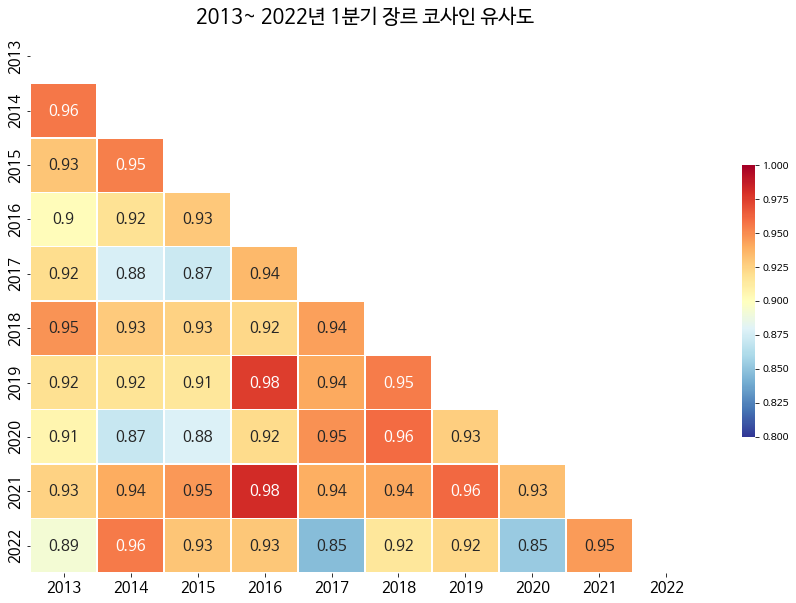

In [ ]:
# 2013~2022년 1분기 코사인 유사도 히트맵 시각화
similarity_simple_pair1 = cosine_similarity(feature_vect_simple , feature_vect_simple)
index = ['2013','2014','2015','2016','2017','2018','2019','2020', '2021', '2022']
col = ['2013','2014','2015','2016','2017','2018','2019','2020', '2021', '2022']
result = pd.DataFrame(similarity_simple_pair1, index = index, columns = col )
df = result
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(15,10))

# 제목지정
plt.title('2013~ 2022년 1분기 장르 코사인 유사도', size = 20)

# 축 글자 크기 수정
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = 0.8,vmax = 1,   # 컬러바 범위 -1 ~ 1
            annot_kws = {'size': 15})  
plt.show()

In [ ]:
# 2013~2022년 2분기 코사인 유사도 
similarity_simple_pair2 = cosine_similarity(feature_vect_simple2 , feature_vect_simple2)
result = pd.DataFrame(similarity_simple_pair2)
result

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.965207,0.963711,0.941749,0.894290,0.936417,0.901357,0.930748,0.882208,0.932753
1,0.965207,1.000000,0.958593,0.957342,0.932756,0.946200,0.934496,0.929817,0.922916,0.958881
2,0.963711,0.958593,1.000000,0.982509,0.907883,0.945560,0.927370,0.936469,0.862574,0.922257
3,0.941749,0.957342,0.982509,1.000000,0.901322,0.930970,0.923831,0.934945,0.876445,0.932759
4,0.894290,0.932756,0.907883,0.901322,1.000000,0.974410,0.930346,0.855096,0.882375,0.890488
5,0.936417,0.946200,0.945560,0.930970,0.974410,1.000000,0.946726,0.901207,0.905821,0.916790
6,0.901357,0.934496,0.927370,0.923831,0.930346,0.946726,1.000000,0.947901,0.941135,0.962656
7,0.930748,0.929817,0.936469,0.934945,0.855096,0.901207,0.947901,1.000000,0.934419,0.967889
8,0.882208,0.922916,0.862574,0.876445,0.882375,0.905821,0.941135,0.934419,1.000000,0.967922
9,0.932753,0.958881,0.922257,0.932759,0.890488,0.916790,0.962656,0.967889,0.967922,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


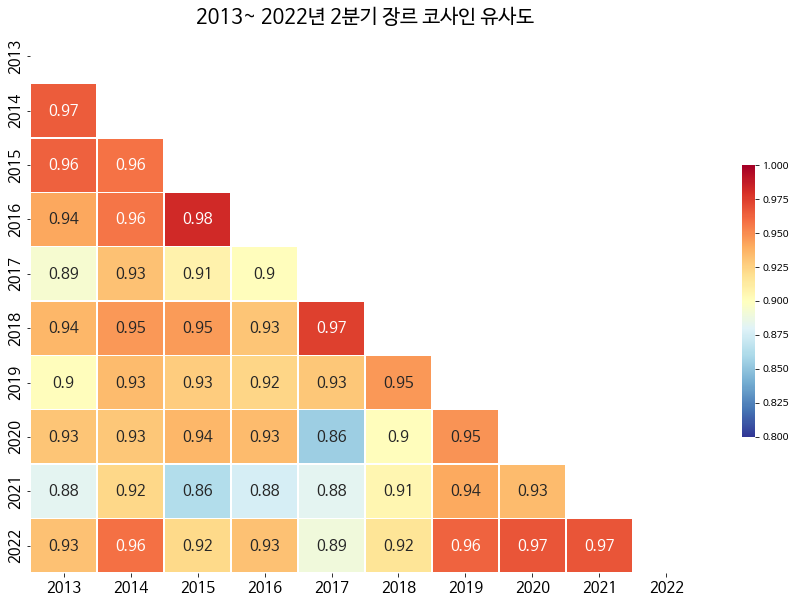

In [ ]:
# 2013~2022년 2분기 코사인 유사도 히트맵 시각화
similarity_simple_pair2 = cosine_similarity(feature_vect_simple2 , feature_vect_simple2)
index = ['2013','2014','2015','2016','2017','2018','2019','2020', '2021', '2022']
col = ['2013','2014','2015','2016','2017','2018','2019','2020', '2021', '2022']
result = pd.DataFrame(similarity_simple_pair2, index = index, columns = col )
df = result
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(15,10))

# 제목지정
plt.title('2013~ 2022년 2분기 장르 코사인 유사도', size = 20)

# 축 글자 크기 수정
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = 0.8,vmax = 1,   # 컬러바 범위 -1 ~ 1
            annot_kws = {'size': 15})  
plt.show()

In [ ]:
# 2012~2021년 3분기 코사인 유사도 
similarity_simple_pair3 = cosine_similarity(feature_vect_simple3 , feature_vect_simple3)
result = pd.DataFrame(similarity_simple_pair3)
result

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.881467,0.881502,0.932247,0.890679,0.921354,0.905395,0.896684,0.927414,0.922082
1,0.881467,1.000000,0.922653,0.942180,0.900892,0.928954,0.917101,0.822294,0.940629,0.959509
2,0.881502,0.922653,1.000000,0.934165,0.902407,0.825738,0.864740,0.813786,0.876780,0.922018
3,0.932247,0.942180,0.934165,1.000000,0.931266,0.924917,0.944984,0.852043,0.927642,0.962684
4,0.890679,0.900892,0.902407,0.931266,1.000000,0.925430,0.936575,0.896604,0.914841,0.958802
5,0.921354,0.928954,0.825738,0.924917,0.925430,1.000000,0.955109,0.897058,0.957384,0.959418
6,0.905395,0.917101,0.864740,0.944984,0.936575,0.955109,1.000000,0.885044,0.961502,0.955304
7,0.896684,0.822294,0.813786,0.852043,0.896604,0.897058,0.885044,1.000000,0.870384,0.891173
8,0.927414,0.940629,0.876780,0.927642,0.914841,0.957384,0.961502,0.870384,1.000000,0.956023
9,0.922082,0.959509,0.922018,0.962684,0.958802,0.959418,0.955304,0.891173,0.956023,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


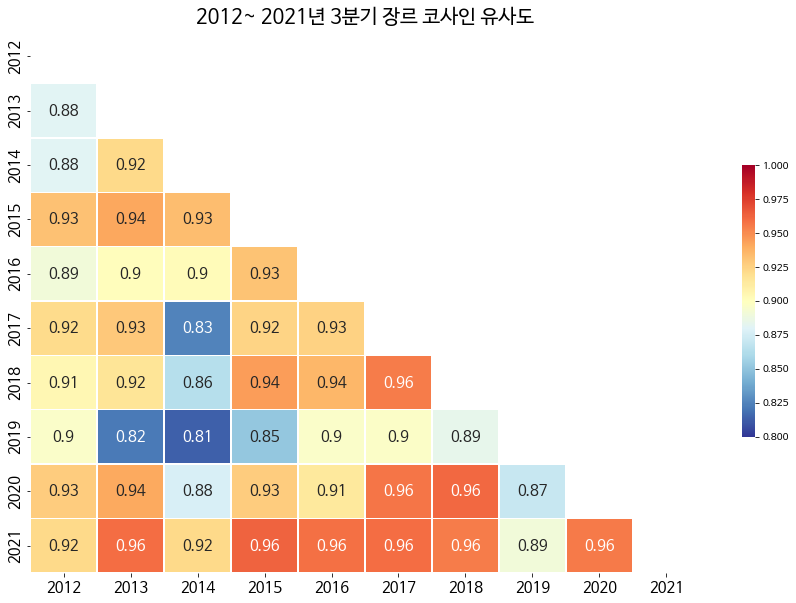

In [ ]:
# 2012~2021년 3분기 코사인 유사도 히트맵 시각화
similarity_simple_pair3 = cosine_similarity(feature_vect_simple3 , feature_vect_simple3)
index = ['2012','2013','2014','2015','2016','2017','2018','2019', '2020', '2021']
col = ['2012','2013','2014','2015','2016','2017','2018','2019', '2020', '2021']
result = pd.DataFrame(similarity_simple_pair3, index = index, columns = col )
df = result
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(15,10))

# 제목지정
plt.title('2012~ 2021년 3분기 장르 코사인 유사도', size = 20)

# 축 글자 크기 수정
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = 0.8,vmax = 1,   # 컬러바 범위 0.8 ~ 1
            annot_kws = {'size': 15})  
plt.show()

In [ ]:
# 2012~2021년 4분기 코사인 유사도 
similarity_simple_pair4 = cosine_similarity(feature_vect_simple4 , feature_vect_simple4)
result = pd.DataFrame(similarity_simple_pair4)
result

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.970071,0.951650,0.951607,0.910363,0.924312,0.918859,0.928271,0.916010,0.905781
1,0.970071,1.000000,0.954044,0.958433,0.906756,0.929030,0.933445,0.925564,0.913311,0.911889
2,0.951650,0.954044,1.000000,0.936543,0.955059,0.936715,0.962899,0.973544,0.929256,0.938013
3,0.951607,0.958433,0.936543,1.000000,0.934054,0.966729,0.927884,0.952150,0.960459,0.931508
4,0.910363,0.906756,0.955059,0.934054,1.000000,0.951161,0.982691,0.968446,0.938956,0.938124
5,0.924312,0.929030,0.936715,0.966729,0.951161,1.000000,0.947906,0.976590,0.982854,0.977825
6,0.918859,0.933445,0.962899,0.927884,0.982691,0.947906,1.000000,0.967820,0.918477,0.939248
7,0.928271,0.925564,0.973544,0.952150,0.968446,0.976590,0.967820,1.000000,0.963801,0.975057
8,0.916010,0.913311,0.929256,0.960459,0.938956,0.982854,0.918477,0.963801,1.000000,0.967014
9,0.905781,0.911889,0.938013,0.931508,0.938124,0.977825,0.939248,0.975057,0.967014,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


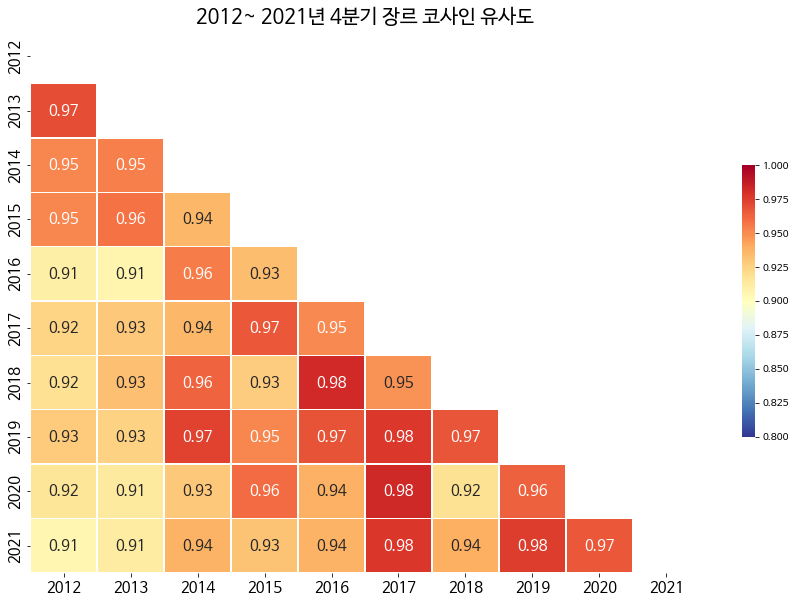

In [ ]:
# 2012~2021년 4분기 코사인 유사도 히트맵 시각화
similarity_simple_pair4 = cosine_similarity(feature_vect_simple4 , feature_vect_simple4)
index = ['2012','2013','2014','2015','2016','2017','2018','2019', '2020', '2021']
col = ['2012','2013','2014','2015','2016','2017','2018','2019', '2020', '2021']
result = pd.DataFrame(similarity_simple_pair4, index = index, columns = col )
df = result
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(15,10))

# 제목지정
plt.title('2012~ 2021년 4분기 장르 코사인 유사도', size = 20)

# 축 글자 크기 수정
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = 0.8,vmax = 1,   # 컬러바 범위 0.8 ~ 1
            annot_kws = {'size': 15})  
plt.show()

# 서울 관객수와 지방 관객수 스크린 배치를 위한 비율 조사 (누적 막대 그래프)

### 데이터 가공 및 전처리


In [ ]:
b = pd.read_csv('/content/drive/MyDrive/데이터톤/data.csv')
data_clear = b.copy() # 카피파일

In [ ]:
data_clear.dtypes # 데이터형태 타입

영화명        object
감독         object
배급사        object
개봉일        object
국적         object
전국 스크린수     int64
전국 매출액      int64
전국 관객수      int64
서울 매출액      int64
서울 관객수      int64
장르         object
등급         object
영화구분       object
dtype: object

In [ ]:
data_clear.sort_values('전국 관객수', ascending = False) # 데이터 내림차순 정렬

,영화명,감독,배급사,개봉일,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,한국,1587,135748398910,17613682,33121225810,4163666,사극,15세이상관람가,일반영화
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,한국,1978,139647979516,16264944,31858660536,3638287,코미디,15세이상관람가,일반영화
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,한국,1912,115698654137,14410754,27530825087,3346172,판타지,12세이상관람가,일반영화
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,한국,966,110828014630,14245998,25842519330,3233946,드라마,12세이상관람가,일반영화
4,어벤져스: 엔드게임,"안소니 루소,조 루소",월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,미국,2835,122182694160,13934592,33577136860,3597963,액션,12세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5502,갈까부다,고봉수,주식회사 씨엠닉스,2019-09-01,한국,5,1398100,403,500100,111,다큐멘터리,12세이상관람가,독립/예술영화
5503,마니,NaN,(주) 인스터 글로벌,2019-06-29,미국,6,9460500,403,7006500,301,공연,12세이상관람가,일반영화
5504,에이리언 스카이라인,닐 존슨,스크린조이,2014-11-13,미국,6,1649000,403,819000,175,액션,15세이상관람가,일반영화
5505,팔스타프,자코포 스피레이,(주)케빈앤컴퍼니,2019-06-16,독일,6,9174000,403,6831000,305,공연,12세이상관람가,일반영화


In [ ]:
dt = data_clear.sort_values('전국 관객수', ascending = False).head(20)
dt

,영화명,감독,배급사,개봉일,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,한국,1587,135748398910,17613682,33121225810,4163666,사극,15세이상관람가,일반영화
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,한국,1978,139647979516,16264944,31858660536,3638287,코미디,15세이상관람가,일반영화
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,한국,1912,115698654137,14410754,27530825087,3346172,판타지,12세이상관람가,일반영화
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,한국,966,110828014630,14245998,25842519330,3233946,드라마,12세이상관람가,일반영화
4,어벤져스: 엔드게임,"안소니 루소,조 루소",월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,미국,2835,122182694160,13934592,33577136860,3597963,액션,12세이상관람가,일반영화
5,겨울왕국 2,"크리스 벅,제니퍼 리",월트디즈니컴퍼니코리아 유한책임회사,2019-11-21,미국,2648,114810421450,13747792,28824682580,3225974,애니메이션,전체관람가,일반영화
6,베테랑,류승완,(주)씨제이이엔엠,2015-08-05,한국,1064,105024756250,13395400,26766369950,3290366,액션,15세이상관람가,일반영화
7,도둑들,최동훈,(주)쇼박스,2012-07-25,한국,1072,93665568500,12983330,26089426500,3468906,액션,15세이상관람가,일반영화
8,7번방의 선물,이환경,(주)넥스트엔터테인먼트월드(NEW),2013-01-23,한국,787,91431914670,12811206,22800931670,3070053,코미디,15세이상관람가,일반영화
9,암살,최동훈,(주)쇼박스,2015-07-22,한국,1519,98463132781,12705700,25306651181,3155960,액션,15세이상관람가,일반영화


In [ ]:
dt1 = dt[['영화명','서울 관객수','전국 관객수']]
dt1

,영화명,서울 관객수,전국 관객수
0,명량,4163666,17613682
1,극한직업,3638287,16264944
2,신과함께-죄와 벌,3346172,14410754
3,국제시장,3233946,14245998
4,어벤져스: 엔드게임,3597963,13934592
5,겨울왕국 2,3225974,13747792
6,베테랑,3290366,13395400
7,도둑들,3468906,12983330
8,7번방의 선물,3070053,12811206
9,암살,3155960,12705700


In [ ]:
dt1['지방 관객수'] = dt1['전국 관객수'] - dt1['서울 관객수']
dt1['서울 관객수 비율'] = dt1['서울 관객수'] / dt1['전국 관객수']
dt1['지방 관객수 비율'] = dt1['지방 관객수'] / dt1['전국 관객수']
dt1['합'] = dt1['서울 관객수 비율'] + dt1['지방 관객수 비율']
dt1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,영화명,서울 관객수,전국 관객수,지방 관객수,서울 관객수 비율,지방 관객수 비율,합
0,명량,4163666,17613682,13450016,0.236388,0.763612,1.0
1,극한직업,3638287,16264944,12626657,0.223689,0.776311,1.0
2,신과함께-죄와 벌,3346172,14410754,11064582,0.232200,0.767800,1.0
3,국제시장,3233946,14245998,11012052,0.227007,0.772993,1.0
4,어벤져스: 엔드게임,3597963,13934592,10336629,0.258204,0.741796,1.0
5,겨울왕국 2,3225974,13747792,10521818,0.234654,0.765346,1.0
6,베테랑,3290366,13395400,10105034,0.245634,0.754366,1.0
7,도둑들,3468906,12983330,9514424,0.267182,0.732818,1.0
8,7번방의 선물,3070053,12811206,9741153,0.239638,0.760362,1.0
9,암살,3155960,12705700,9549740,0.248389,0.751611,1.0


In [ ]:
dt1.drop(columns = ['서울 관객수', '지방 관객수', '전국 관객수','합'], inplace = True)
dt1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,영화명,서울 관객수 비율,지방 관객수 비율
0,명량,0.236388,0.763612
1,극한직업,0.223689,0.776311
2,신과함께-죄와 벌,0.232200,0.767800
3,국제시장,0.227007,0.772993
4,어벤져스: 엔드게임,0.258204,0.741796
5,겨울왕국 2,0.234654,0.765346
6,베테랑,0.245634,0.754366
7,도둑들,0.267182,0.732818
8,7번방의 선물,0.239638,0.760362
9,암살,0.248389,0.751611


In [ ]:
dt1 = dt1.set_index('영화명') # 영화명으로 인덱스 지정

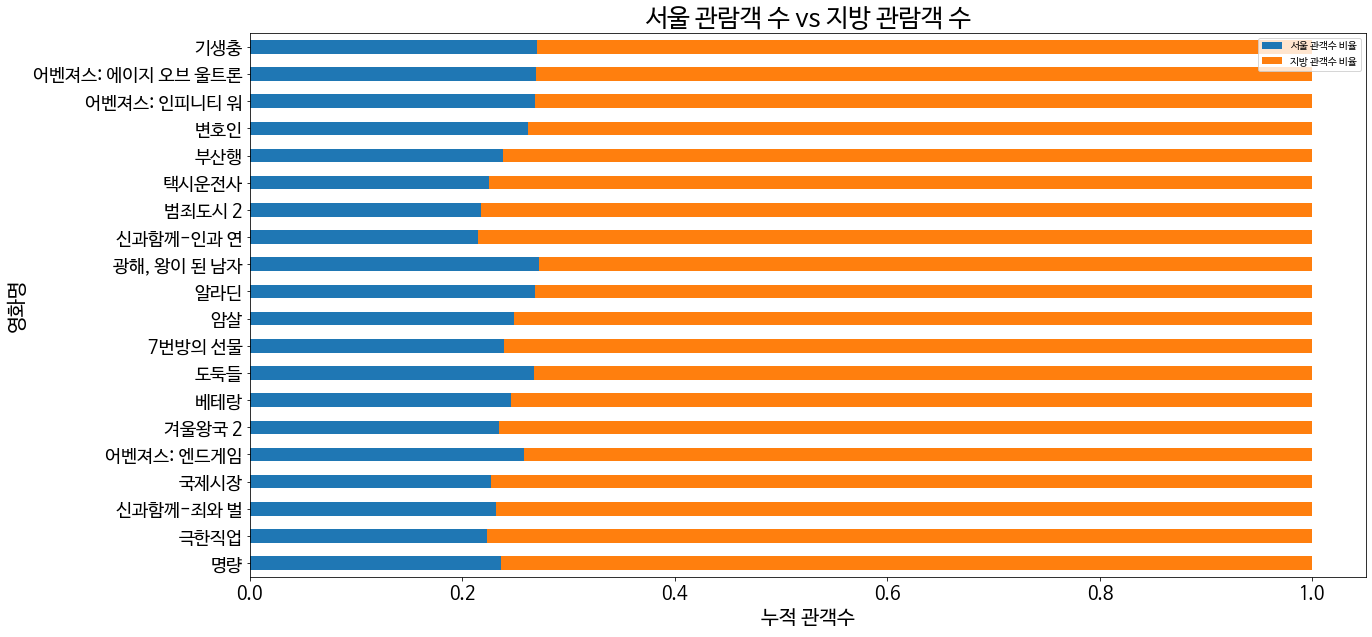

In [ ]:
# 서울 관람객수 vs 지방 관람객 수 그래프 출력
plt.rc('font', family='NanumBarunGothic')
movie_plot = dt1.plot(kind = 'barh', figsize = (20,10), stacked = True)

plt.xlabel('누적 관객수', size = 20)
plt.xticks(fontsize = 18)
plt.ylabel('영화명', size = 20)
plt.yticks(fontsize = 18)
plt.title('서울 관람객 수 vs 지방 관람객 수', size = 25)
plt.show()

In [ ]:
dt1['서울 관객수 비율'].median()# 서울 관객 중앙값
dt1['지방 관객수 비율'].median()# 지방 관객 중앙값
print(dt1['서울 관객수 비율'].median(), dt1['지방 관객수 비율'].median()) # 서울 24%, 지방 76%

0.24263605929080018 0.7573639407091999


# 배급사 별 개봉 장르 순위 (막대 그래프)

## 데이터 가공 및 전처리

### 분석할 데이터 불러오기


In [ ]:
# 분석할 데이터 경로 지정
data_clear = pd.read_csv('/content/drive/MyDrive/데이터톤/data.csv')

In [ ]:
dt2 = data_clear[['배급사', '장르']]
dt2.reset_index()

,index,배급사,장르
0,0,(주)씨제이이엔엠,사극
1,1,(주)씨제이이엔엠,코미디
2,2,롯데쇼핑㈜롯데엔터테인먼트,판타지
3,3,(주)씨제이이엔엠,드라마
4,4,월트디즈니컴퍼니코리아 유한책임회사,액션
...,...,...,...
5502,5502,주식회사 씨엠닉스,다큐멘터리
5503,5503,(주) 인스터 글로벌,공연
5504,5504,스크린조이,액션
5505,5505,(주)케빈앤컴퍼니,공연


In [ ]:
data_clear['배급사'].value_counts().head(10)

(주)씨제이이엔엠              187
유니버설픽쳐스인터내셔널 코리아(유)    171
(주)팝엔터테인먼트             171
(주)영화사 진진              131
(주)넥스트엔터테인먼트월드(NEW)    131
롯데쇼핑㈜롯데엔터테인먼트          128
와이드 릴리즈(주)             121
(주)박수엔터테인먼트            121
(주)소나무픽쳐스              104
워너브러더스 코리아(주)          103
Name: 배급사, dtype: int64

In [ ]:
# 배급사 TOP10 리스트 추출
index = ['(주)씨제이이엔엠', '유니버설픽쳐스인터내셔널 코리아(유)', '(주)팝엔터테인먼트', '(주)넥스트엔터테인먼트월드(NEW)', '(주)영화사 진진',
        '롯데쇼핑㈜롯데엔터테인먼트', '와이드 릴리즈(주)', '(주)박수엔터테인먼트', '(주)소나무픽쳐스', '워너브러더스 코리아(주)']

### 반복문을 이용하여 리스트 형태로 배급사 이름을 받아 super_list에 저장

In [ ]:
suplier_list = [] # 빈 리스트 생성
for i in index: # 인덱스의 갯수만큼 반복
  suplier = data_clear[data_clear['배급사'] == i] # 배급사 컬럼안에 있는 인자들 추출
  suplier_list.append(suplier) # 빈 리스트에 인자전달  
suplier_list

[                            영화명           감독        배급사         개봉일  국적  \
 0                            명량          김한민  (주)씨제이이엔엠  2014-07-30  한국   
 1                          극한직업          이병헌  (주)씨제이이엔엠  2019-01-23  한국   
 3                          국제시장          윤제균  (주)씨제이이엔엠  2014-12-17  한국   
 6                           베테랑          류승완  (주)씨제이이엔엠  2015-08-05  한국   
 11                  광해, 왕이 된 남자          추창민  (주)씨제이이엔엠  2012-09-13  한국   
 ...                         ...          ...        ...         ...  ..   
 3223                     신촌좀비만화  류승완,한지승,김태용  (주)씨제이이엔엠  2014-05-15  한국   
 3499                그 강아지 그 고양이          민병우  (주)씨제이이엔엠  2013-12-12  한국   
 3554  신비아파트 뮤지컬 시즌3 : 뱀파이어왕의 비밀          김종해  (주)씨제이이엔엠  2021-05-22  한국   
 3726                       소리굽쇠          추상록  (주)씨제이이엔엠  2014-10-30  한국   
 4149                땡큐 포 유어 서비스        제이슨 홀  (주)씨제이이엔엠  2017-12-07  미국   
 
       전국 스크린수        전국 매출액    전국 관객수       서울 매출액   서울 관객수      장르        등급  \
 0  

### 빈 데이터프레임을 지정하여 super_list를 데이터 프레임으로 변환



In [ ]:
suplier_10 = pd.DataFrame() # 빈 데이터 프레임 생성
for i in range(len(suplier_list)): # 리스트의 길이만큼 반복
  suplier_10 = pd.concat([suplier_10 ,suplier_list[i]], axis = 0) # pd.concat함수로 빈 데이터 프레임에 리스트 값 합치기
suplier_10

,영화명,감독,배급사,개봉일,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,한국,1587,135748398910,17613682,33121225810,4163666,사극,15세이상관람가,일반영화
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,한국,1978,139647979516,16264944,31858660536,3638287,코미디,15세이상관람가,일반영화
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,한국,966,110828014630,14245998,25842519330,3233946,드라마,12세이상관람가,일반영화
6,베테랑,류승완,(주)씨제이이엔엠,2015-08-05,한국,1064,105024756250,13395400,26766369950,3290366,액션,15세이상관람가,일반영화
11,"광해, 왕이 된 남자",추창민,(주)씨제이이엔엠,2012-09-13,한국,810,88900208769,12319542,25192804727,3355700,사극,15세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,굿 라이어,빌 콘돈,워너브러더스 코리아(주),2019-12-05,미국,324,187789720,23262,82224340,9995,스릴러,15세이상관람가,일반영화
2107,스페이스 잼: 새로운 시대,말콤 D. 리,워너브러더스 코리아(주),2021-07-15,미국,521,165586380,18241,38954950,3943,애니메이션,전체관람가,일반영화
2263,크리드2,스티븐 카플 주니어,워너브러더스 코리아(주),2019-02-21,미국,298,122284190,15023,45949660,5556,액션,12세이상관람가,일반영화
2612,킹 리차드,레이날도 마르쿠스 그린,워너브러더스 코리아(주),2022-03-24,미국,156,99918100,10266,50886300,5068,가족,12세이상관람가,일반영화


### 필요한 컬럼을 추출하여 데이터프레임 생성

In [ ]:
dt3 = suplier_10[['배급사','장르','전국 관객수']]
dt3.reset_index()
dt3

,배급사,장르,전국 관객수
9,(주)씨제이이엔엠,애니메이션,1075584
19,(주)씨제이이엔엠,애니메이션,348883
49,(주)씨제이이엔엠,멜로/로맨스,414083
61,(주)씨제이이엔엠,애니메이션,1452872
75,(주)씨제이이엔엠,미스터리,49925
...,...,...,...
5109,워너브러더스 코리아(주),애니메이션,135362
5140,워너브러더스 코리아(주),액션,418281
5330,워너브러더스 코리아(주),가족,10266
5369,워너브러더스 코리아(주),액션,897836


### 특정 배급사 컬럼에 있는 장르별 갯수 추출

In [ ]:
sup_cj=suplier_list[0][suplier_list[0]['배급사']=='(주)씨제이이엔엠']
cj_genre = pd.DataFrame(sup_cj['장르'].value_counts())
cj_genre

,장르
애니메이션,61
드라마,30
액션,22
멜로/로맨스,17
범죄,14
스릴러,10
코미디,10
미스터리,9
사극,7
전쟁,2


### 필요한 컬럼 및 인자 추출 후 그래프를 출력하는 함수지정

In [ ]:
import matplotlib.pyplot as plt
def sup_func (x,y):
  # 입력받은 배급사 별 장르카운트 추출
  supply = suplier_list[x][suplier_list[x]['배급사']==y]
  supply_df = pd.DataFrame(supply['장르'].value_counts())

  # 그래프 그리기
  plt.rc('font', family='NanumBarunGothic') # 한글 폰트 다운로드
  supply_plot = supply_df.plot(kind = 'bar', figsize = (20,10), stacked = True)
  plt.xlabel('장르', size = 20)
  plt.xticks(fontsize = 18, rotation = 360)
  plt.ylabel('count', size = 20)
  plt.yticks(fontsize = 18, rotation = 90)
  plt.title(y, size = 15)
  plt.show()

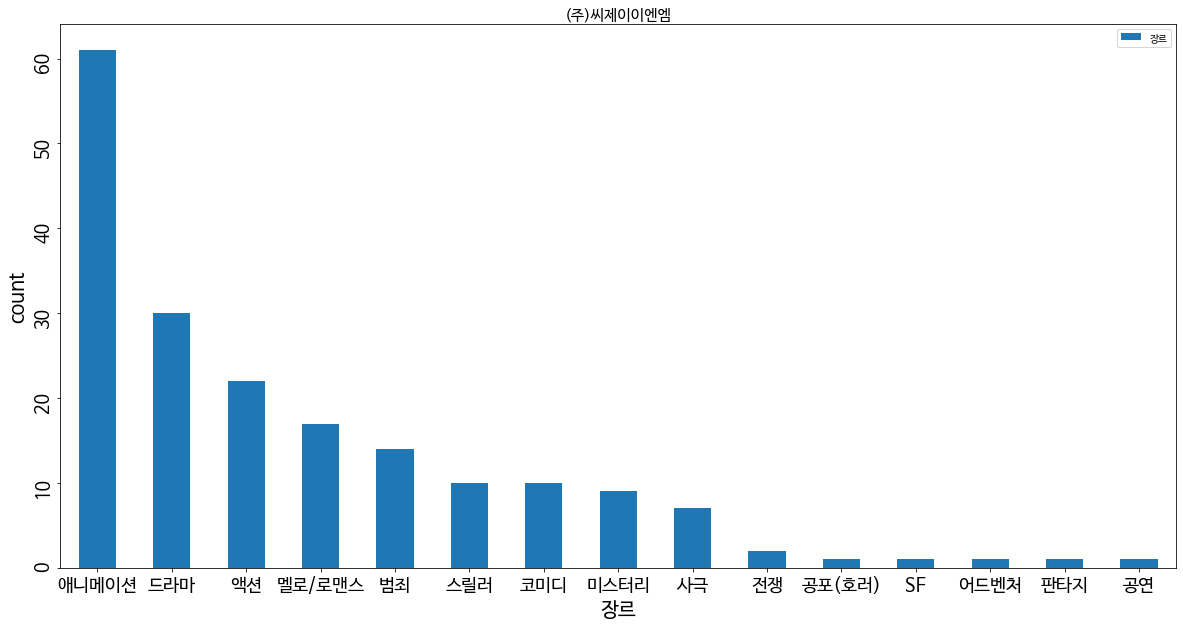

In [ ]:
sup_func(0,'(주)씨제이이엔엠')

# 결론

# 결과 요약

# 1. 10년치 월 간 관객수 및 영화 개봉 수 시각화 결과 

- 전국 관객수와 개봉 영화 수 추세는 일지하지않음

# 2. 10년치 연 간 장르 키워드를 추출한 워드클라우드

- 10년 간 장르 키워드를 통한 워드클라우드에서는 드라마, 애니메이션, 액션 등 순이었다.
- 연간 장르 키워드를 추출한 결과 매년 상위권에 있는 장르와 10년 간 상위권에 있는 키워드는 비슷한 양상을 보였다.
- 이것으로 드라마, 애니메이션, 액션이 많이 개봉되는 영화인것을 알 수 있다.

# 3. 10년치 장르 키워드를 활용한 코사인 유사도 분석

- 각 년도 분기 장르 키워드를 추출하여 유사도 비교를 수행한 결과 매 년 유사하다는 결과를 알 수 있다.
- 장르가 분기별로 큰 영향을 받지 않는다.

# 4. 10년치 개봉영화 국적 및 누적 관객수 비교 결과
- 한국, 미국 영화가 압도적으로 분포되어있었고, 누적 관객수 또한 이와 같은 양상을 보여주었다.
- 이에, 배급을 결정하기에 한국 또는 미국 국적의 영화를 배급하는 것이 좋다고 본다.

# 5. 스크린수 분배를 통한 서울과 지방 관객 수 비교
- 전국 관객수 상위 TOP20 영화들의 서울과 지방 관객 수 비율을 비교한 결과, 평균적으로 서울 24%, 지방 76%의 비율을 보여주었다. 이는 대한민국의 서울과 지방의 인구비와 유사한 양상을 보인다.
- 이에, 배급사는 스크린 수를 배정할 때 지역별 인구비를 고려해야한다.

# 6. TOP10 배급사의 주요 개봉 장르
- TOP10 배급사의 개봉 영화 장르 빈도를 시각화 결과 액션, 애니메이션, 드라마가 상위권으로 나타났다. 
- 이에, 이런 상위권에 있는 장르를 배급하는 것이 사업적으로 리스크가 적은 배급이라고 생각한다.